# Santander Customer Satisfaction Prediction


From frontline support teams to C-suites, customer satisfaction is a key measure of success. Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving.

Santander Bank is asking Kagglers to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late.

In this competition, you'll work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.

**Source:**
https://www.kaggle.com/c/santander-customer-satisfaction

In [1]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
%matplotlib inline
import matplotlib
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.plotly as py
import matplotlib.mlab as mlab
from patsy import dmatrices
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
from sklearn import ensemble
from sklearn.metrics import roc_auc_score as auc
import time
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
# display all the columns
pd.set_option('display.line_width', 5000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

line_width has been deprecated, use display.width instead (currently both are
identical)



In [3]:
# # Load santandertrain.csv file
data = pd.read_csv("/Users/annalie/Documents/Data Science/Kaggle/Santander/train.csv")

In [6]:
print data.shape
data.head()   

(76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [7]:
# explore data types of variables

print "# of unique num_var25: ", len(data['num_var25'].unique()), "(category)"
# print "unique num_var25: ", data['num_var25'].unique()

print "# of unique num_meses_var13_corto_ult3: ", len(data['num_meses_var13_corto_ult3'].unique()), "(category)" 
# print "unique num_op_var39_hace2: ", data['num_op_var39_hace2'].unique()

print "# of unique saldo_var13_largo: ", len(data['saldo_var13_largo'].unique()), "(number)"
# print "unique saldo_var13_largo: ", data['saldo_var13_largo'].unique()

print "# of unique imp_var7_recib_ult1: ", len(data['imp_var7_recib_ult1'].unique()), "(number)"
# print "unique imp_var7_recib_ult1: ", data['imp_var7_recib_ult1'].unique()

print "# of unique var21: ", len(data['var21'].unique()), "(number)"
# print "unique var21: ", data['var21'].unique()

print "# of unique var36: ", len(data['var36'].unique()), "(category)"
# print "unique var36: ", data['var36'].unique()

print "# of unique var38: ", len(data['var38'].unique()), "(number)"
# print "unique var38: ", data['var38'].unique()

print "# of unique var3: ", len(data['var3'].unique()), "(number)"
# print "unique var3: ", data['var3'].unique()

print "# of unique var15: ", len(data['var15'].unique()), "(number)"
# print "unique var15: ", data['var15'].unique()

# of unique num_var25:  9 (category)
# of unique num_meses_var13_corto_ult3:  4 (category)
# of unique saldo_var13_largo:  229 (number)
# of unique imp_var7_recib_ult1:  184 (number)
# of unique var21:  24 (number)
# of unique var36:  5 (category)
# of unique var38:  57736 (number)
# of unique var3:  208 (number)
# of unique var15:  100 (number)


In [8]:
# create seperate datasets per logically grouped variables
basic_data = data[['TARGET', 'ID', 'var3', 'var15', 'var36', 'var21', 'var38']]
saldo_data = data[['TARGET', 'ID', 'saldo_var1',
 'saldo_var5',
 'saldo_var6',
 'saldo_var8',
 'saldo_var12',
 'saldo_var13_corto',
 'saldo_var13_largo',
 'saldo_var13_medio',
 'saldo_var13',
 'saldo_var14',
 'saldo_var17',
 'saldo_var18',
 'saldo_var20',
 'saldo_var24',
 'saldo_var26',
 'saldo_var25',
 'saldo_var28',
 'saldo_var27',
 'saldo_var29',
 'saldo_var30',
 'saldo_var31',
 'saldo_var32',
 'saldo_var33',
 'saldo_var34',
 'saldo_var37',
 'saldo_var40',
 'saldo_var41',
 'saldo_var42',
 'saldo_var44',
 'saldo_var46',
 'saldo_var2_ult1',
 'saldo_medio_var5_hace2',
 'saldo_medio_var5_hace3',
 'saldo_medio_var5_ult1',
 'saldo_medio_var5_ult3',
 'saldo_medio_var8_hace2',
 'saldo_medio_var8_hace3',
 'saldo_medio_var8_ult1',
 'saldo_medio_var8_ult3',
 'saldo_medio_var12_hace2',
 'saldo_medio_var12_hace3',
 'saldo_medio_var12_ult1',
 'saldo_medio_var12_ult3',
 'saldo_medio_var13_corto_hace2',
 'saldo_medio_var13_corto_hace3',
 'saldo_medio_var13_corto_ult1',
 'saldo_medio_var13_corto_ult3',
 'saldo_medio_var13_largo_hace2',
 'saldo_medio_var13_largo_hace3',
 'saldo_medio_var13_largo_ult1',
 'saldo_medio_var13_largo_ult3',
 'saldo_medio_var13_medio_hace2',
 'saldo_medio_var13_medio_hace3',
 'saldo_medio_var13_medio_ult1',
 'saldo_medio_var13_medio_ult3',
 'saldo_medio_var17_hace2',
 'saldo_medio_var17_hace3',
 'saldo_medio_var17_ult1',
 'saldo_medio_var17_ult3',
 'saldo_medio_var29_hace2',
 'saldo_medio_var29_hace3',
 'saldo_medio_var29_ult1',
 'saldo_medio_var29_ult3',
 'saldo_medio_var33_hace2',
 'saldo_medio_var33_hace3',
 'saldo_medio_var33_ult1',
 'saldo_medio_var33_ult3',
 'saldo_medio_var44_hace2',
 'saldo_medio_var44_hace3',
 'saldo_medio_var44_ult1',
 'saldo_medio_var44_ult3']]
ind_data = data[['TARGET', 'ID', 'ind_var1_0',
 'ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var5_0',
 'ind_var5',
 'ind_var6_0',
 'ind_var6',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13_largo_0',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var13',
 'ind_var14_0',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var26',
 'ind_var25_0',
 'ind_var25',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var30',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var37_cte',
 'ind_var37_0',
 'ind_var37',
 'ind_var39_0',
 'ind_var40_0',
 'ind_var40',
 'ind_var41_0',
 'ind_var41',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'ind_var46_0',
 'ind_var46',
 'ind_var7_emit_ult1',
 'ind_var7_recib_ult1',
 'ind_var10_ult1',
 'ind_var10cte_ult1',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'ind_var43_emit_ult1',
 'ind_var43_recib_ult1']]
num_data = data[['TARGET', 'ID', 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_aport_var13_hace3',
 'num_aport_var13_ult1',
 'num_aport_var17_hace3',
 'num_aport_var17_ult1',
 'num_aport_var33_hace3',
 'num_aport_var33_ult1',
 'num_var7_emit_ult1',
 'num_var7_recib_ult1',
 'num_compra_var44_hace3',
 'num_compra_var44_ult1',
 'num_ent_var16_ult1',
 'num_var22_hace2',
 'num_var22_hace3',
 'num_var22_ult1',
 'num_var22_ult3',
 'num_med_var22_ult3',
 'num_med_var45_ult3',
 'num_meses_var5_ult3',
 'num_meses_var8_ult3',
 'num_meses_var12_ult3',
 'num_meses_var13_corto_ult3',
 'num_meses_var13_largo_ult3',
 'num_meses_var13_medio_ult3',
 'num_meses_var17_ult3',
 'num_meses_var29_ult3',
 'num_meses_var33_ult3',
 'num_meses_var39_vig_ult3',
 'num_meses_var44_ult3',
 'num_op_var39_comer_ult1',
 'num_op_var39_comer_ult3',
 'num_op_var40_comer_ult1',
 'num_op_var40_comer_ult3',
 'num_op_var40_efect_ult1',
 'num_op_var40_efect_ult3',
 'num_op_var41_comer_ult1',
 'num_op_var41_comer_ult3',
 'num_op_var41_efect_ult1',
 'num_op_var41_efect_ult3',
 'num_op_var39_efect_ult1',
 'num_op_var39_efect_ult3',
 'num_reemb_var13_hace3',
 'num_reemb_var13_ult1',
 'num_reemb_var17_hace3',
 'num_reemb_var17_ult1',
 'num_reemb_var33_hace3',
 'num_reemb_var33_ult1',
 'num_sal_var16_ult1',
 'num_var43_emit_ult1',
 'num_var43_recib_ult1',
 'num_trasp_var11_ult1',
 'num_trasp_var17_in_hace3',
 'num_trasp_var17_in_ult1',
 'num_trasp_var17_out_hace3',
 'num_trasp_var17_out_ult1',
 'num_trasp_var33_in_hace3',
 'num_trasp_var33_in_ult1',
 'num_trasp_var33_out_hace3',
 'num_trasp_var33_out_ult1',
 'num_venta_var44_hace3',
 'num_venta_var44_ult1',
 'num_var45_hace2',
 'num_var45_hace3',
 'num_var45_ult1',
 'num_var45_ult3',
 'num_var1_0',
 'num_var1',
 'num_var4',
 'num_var5_0',
 'num_var5',
 'num_var6_0',
 'num_var6',
 'num_var8_0',
 'num_var8',
 'num_var12_0',
 'num_var12',
 'num_var13_0',
 'num_var13_corto_0',
 'num_var13_corto',
 'num_var13_largo_0',
 'num_var13_largo',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var13',
 'num_var14_0',
 'num_var14',
 'num_var17_0',
 'num_var17',
 'num_var18_0',
 'num_var18',
 'num_var20_0',
 'num_var20',
 'num_var24_0',
 'num_var24',
 'num_var26_0',
 'num_var26',
 'num_var25_0',
 'num_var25',
 'num_op_var40_hace2',
 'num_op_var40_hace3',
 'num_op_var40_ult1',
 'num_op_var40_ult3',
 'num_op_var41_hace2',
 'num_op_var41_hace3',
 'num_op_var41_ult1',
 'num_op_var41_ult3',
 'num_op_var39_hace2',
 'num_op_var39_hace3',
 'num_op_var39_ult1',
 'num_op_var39_ult3',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var29_0',
 'num_var29',
 'num_var30_0',
 'num_var30',
 'num_var31_0',
 'num_var31',
 'num_var32_0',
 'num_var32',
 'num_var33_0',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'num_var35',
 'num_var37_med_ult2',
 'num_var37_0',
 'num_var37',
 'num_var39_0',
 'num_var40_0',
 'num_var40',
 'num_var41_0',
 'num_var41',
 'num_var39',
 'num_var42_0',
 'num_var42',
 'num_var44_0',
 'num_var44',
 'num_var46_0',
 'num_var46']]

In [9]:
basic_data.head()

,TARGET,ID,var3,var15,var36,var21,var38
0,0,1,2,23,99,0,39205.170000
1,0,3,2,34,3,0,49278.030000
2,0,4,2,23,99,0,67333.770000
3,0,8,2,37,2,0,64007.970000
4,0,10,2,39,1,0,117310.979016


In [10]:
# make the ID variable the index
basic_data = basic_data.set_index('ID')

In [11]:
basic_data.dtypes

TARGET      int64
var3        int64
var15       int64
var36       int64
var21       int64
var38     float64
dtype: object

In [12]:
basic_data['var36'] = basic_data.var36.astype(float)
basic_data['var3'] = basic_data.var3.astype(float)
basic_data['var15'] = basic_data.var15.astype(float)
basic_data['var21'] = basic_data.var21.astype(float)

basic_data.dtypes

TARGET      int64
var3      float64
var15     float64
var36     float64
var21     float64
var38     float64
dtype: object

In [11]:
# shape of basic_data
print basic_data.shape

# frequency distribution of 'var3'
print "frequencies var3: ", pd.value_counts(basic_data['var3'].values, sort = True)

# frequency distribution of 'var15'
print "frequencies var15: ", pd.value_counts(basic_data['var15'].values, sort = True)

# frequency distribution of 'var36'
print "frequencies var36: ", pd.value_counts(basic_data['var36'].values, sort = True)

# frequency distribution of 'var36'
print "frequencies var21: ", pd.value_counts(basic_data['var21'].values, sort = True)

(76020, 6)
frequencies var3:   2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
 6            82
 0            75
 10           72
 11           66
 5            63
 14           61
 15           34
 18           10
 16            9
 17            7
 23            7
 142           6
 38            6
 20            6
 31            6
 25            6
 154           6
 138           5
 149           5
 30            5
 91            5
 114           5
 153           5
 192           5
 24            5
 22            5
 174           4
 209           4
 102           4
 147           4
 103           4
 162           4
 48            4
 46            4
 21            4
 133           4
 172           4
 129           4
 183           4
 36            4
 27            4
 28            4
 110           4
 158           4
 86            4
 88            3
 118           3
 

Notes:
The value 99.0 of the variable var36,
75152 of the variable var21,
-999999 of the variable var3
don't tell me anything, so remove these values from the dataset.

In [13]:
basic_data2 = basic_data[(basic_data.var36 != 99.0) & (basic_data.var21 != 0) & (basic_data.var3 != -999999)]
basic_data2.shape

(775, 6)

0       411
2      8704
1     14664
3     22177
99    30064
dtype: int64

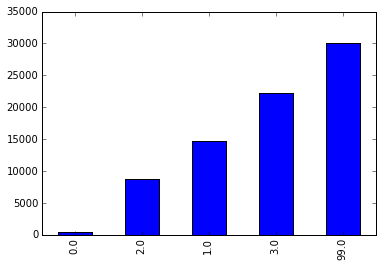

In [14]:
var36_freq = basic_data['var36'].value_counts(ascending=True)

fig = plt.figure()
var36_freq.plot(kind='bar')

var36_freq

In [15]:
# create dummy variables for the variable 'var36'
# join the dummy variables to the main dataframe
# rename dummy variable names
basic_data_dummy = pd.concat([basic_data, pd.get_dummies(basic_data['var36']).rename(columns=lambda x: 'var36_' + str(x))], axis=1)
basic_data_dummy.head()

# basic_data2_dummy = pd.concat([basic_data2, pd.get_dummies(basic_data2['var36']).rename(columns=lambda x: 'var36_' + str(x))], axis=1)
# basic_data2_dummy.head()

,TARGET,var3,var15,var36,var21,var38,var36_0.0,var36_1.0,var36_2.0,var36_3.0,var36_99.0
ID,,,,,,,,,,,
1,0,2,23,99,0,39205.170000,0,0,0,0,1
3,0,2,34,3,0,49278.030000,0,0,0,1,0
4,0,2,23,99,0,67333.770000,0,0,0,0,1
8,0,2,37,2,0,64007.970000,0,0,1,0,0
10,0,2,39,1,0,117310.979016,0,1,0,0,0


# For example: run an logistic regression analysis

In [16]:
# select the features and target for the classification algorythm
predictors = basic_data_dummy[['var3', 'var15', 'var36', 'var21', 'var38', 'var36_1.0', 'var36_2.0', 'var36_3.0']] 
target = basic_data_dummy['TARGET']

In [17]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics

In [18]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors.values, target.values, test_size=.2)

In [19]:
# show the shape of the train and test sets
print "(rows, columns)"
print "pred_train shape =", pred_train.shape
print "pred_test shape =", pred_test.shape
print "tar_train shape =", tar_train.shape
print "tar_test shape =", tar_test.shape

(rows, columns)
pred_train shape = (60816, 8)
pred_test shape = (15204, 8)
tar_train shape = (60816,)
tar_test shape = (15204,)


In [20]:
# Logistic Regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
lr_model = LogisticRegression()
lr_model.fit(pred_train, tar_train)
print(lr_model)
# make predictions
lr_predictions = lr_model.predict(pred_test)
# summarize the fit of the model
print(metrics.classification_report(tar_test, lr_predictions))
print(metrics.confusion_matrix(tar_test, lr_predictions))
print "accuracy score:", sklearn.metrics.accuracy_score(tar_test, lr_predictions)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98     14599
          1       0.00      0.00      0.00       605

avg / total       0.92      0.96      0.94     15204

[[14599     0]
 [  605     0]]
accuracy score: 0.960207840042


/Users/annalie/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [21]:
# show coefficients of the variables. Which variables contributes the most?
lr_model.coef_

array([[  1.06613206e-06,  -3.70341493e-02,   3.12102775e-03,
          5.92489591e-05,  -2.09514912e-05,  -5.88000175e-04,
         -3.97691113e-04,  -2.15453845e-03]])

In [22]:
lr_model2 = LogisticRegression()
lr_model2.fit(predictors, target.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [23]:
# create a list of the coefficients with the variables

# select the features and target for the classification algorythm
features = basic_data_dummy[['var3', 'var15', 'var36', 'var21', 'var38', 'var36_1.0', 'var36_2.0', 'var36_3.0']] 
targetcolumn = ['TARGET']
labels = pd.DataFrame(basic_data_dummy, columns = targetcolumn)
print zip(map(lambda x: round(x, 4), lr_model2.coef_), featurearray)

TypeError: only length-1 arrays can be converted to Python scalars

# Decision Trees

In [24]:
basic_data_dummy.head()

,TARGET,var3,var15,var36,var21,var38,var36_0.0,var36_1.0,var36_2.0,var36_3.0,var36_99.0
ID,,,,,,,,,,,
1,0,2,23,99,0,39205.170000,0,0,0,0,1
3,0,2,34,3,0,49278.030000,0,0,0,1,0
4,0,2,23,99,0,67333.770000,0,0,0,0,1
8,0,2,37,2,0,64007.970000,0,0,1,0,0
10,0,2,39,1,0,117310.979016,0,1,0,0,0


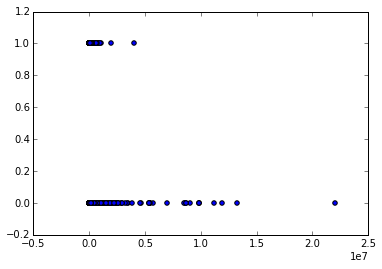

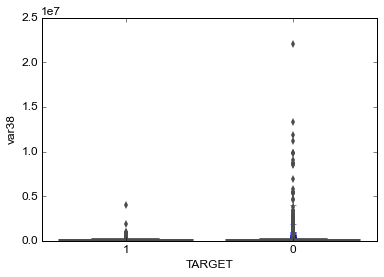

In [25]:
# check on non-linearity between dependent and independent variables

# scatterplot for var38
plt.scatter(basic_data_dummy.var38, basic_data_dummy.TARGET)
plt.show()

# boxplots for var38
plt.boxplot([basic_data_dummy.var38[basic_data_dummy.TARGET == 1], basic_data_dummy.var38[basic_data_dummy.TARGET == 0]])

# or:
import seaborn as sns
boxplot_var38 = sns.boxplot(x="TARGET", y="var38", data = basic_data_dummy, order=[1, 0])

In [26]:
# prepare data for modeling

# select the features and target for the classification algorythm
features = basic_data_dummy[['var3', 'var15', 'var36', 'var21', 'var38', 'var36_1.0', 'var36_2.0', 'var36_3.0']]
print features[:5]

targetcolumn = ['TARGET']
labels = pd.DataFrame(basic_data_dummy, columns = targetcolumn)
labels2 = basic_data_dummy['TARGET']
print labels[:5]

    var3  var15  var36  var21          var38  var36_1.0  var36_2.0  var36_3.0
ID                                                                           
1      2     23     99      0   39205.170000          0          0          0
3      2     34      3      0   49278.030000          0          0          1
4      2     23     99      0   67333.770000          0          0          0
8      2     37      2      0   64007.970000          0          1          0
10     2     39      1      0  117310.979016          1          0          0
    TARGET
ID        
1        0
3        0
4        0
8        0
10       0


In [27]:
# create an array list of the variables

X = basic_data_dummy.loc[:, ['var3', 'var15', 'var36', 'var21', 'var38', 'var36_1.0', 'var26_1.0', 'var26_2.0', 'var26_3.0']]
featurelist = X.columns.tolist()
featurearray = np.asarray(featurelist)
print featurelist

['var3', 'var15', 'var36', 'var21', 'var38', 'var36_1.0', 'var26_1.0', 'var26_2.0', 'var26_3.0']


In [28]:
# predict the likelihood of an satisfied customer with the decision tree model for different algorithms

# split the model in a training and test set
pred_train, pred_test, tar_train, tar_test = cross_validation.train_test_split(features, labels, test_size=0.5, random_state=1)

# show the shape of the train and test sets
print "(rows, columns)"
print "pred_train shape =", pred_train.shape
print "pred_test shape =", pred_test.shape
print "tar_train shape =", tar_train.shape
print "tar_test shape =", tar_test.shape

# show counts of satisfied versus unsatisfied customers in dataset
print "# satisfied versus unsatisfied customers in orginial dataset (basic_data_dummy):", 
print labels.TARGET.value_counts()
print "---"
print "# satisfied versus unsatisfied customers in training set:"
print pd.value_counts(tar_train['TARGET'].values, sort=False)
print "---"
print "# satisfied versus unsatisfied customers in test set:"
print pd.value_counts(tar_test['TARGET'].values, sort=False)

(rows, columns)
pred_train shape = (38010, 8)
pred_test shape = (38010, 8)
tar_train shape = (38010, 1)
tar_test shape = (38010, 1)
# satisfied versus unsatisfied customers in orginial dataset (basic_data_dummy): 0    73012
1     3008
dtype: int64
---
# satisfied versus unsatisfied customers in training set:
0    36482
1     1528
dtype: int64
---
# satisfied versus unsatisfied customers in test set:
0    36530
1     1480
dtype: int64


In [29]:
# because we do a classification and regression tree, use the gini algorithm for CART algorithm

# create tree object
dt_model_gini = tree.DecisionTreeClassifier(criterion='gini')
# train the model using the complete dataset (no training versus test set)
dt_model_gini.fit(features, labels)
print "feature importances:"
print dt_model_gini.feature_importances_

# print array of feature importance per variable
print "---"
print "Features sorted by their score:"
dt_model_gini_sorted_array = sorted(zip(map(lambda x: round(x, 4), dt_model_gini.feature_importances_), featurearray), reverse=True)[:35]
print dt_model_gini_sorted_array

# predict likelihood of satisfaction for customer
dt_predictions = dt_model_gini.predict(pred_test)

# summarize the fit of the model
print "---"
print "classification report:"
print(metrics.classification_report(tar_test, dt_predictions))
print "---"
print "confusion matrix"
print(metrics.confusion_matrix(tar_test, dt_predictions))
print "---"
print "accuracy score: ", metrics.accuracy_score(tar_test, dt_predictions)

feature importances:
[ 0.00901476  0.17286245  0.03823063  0.00575547  0.76216808  0.0043152
  0.00408938  0.00356402]
---
Features sorted by their score:
[(0.7622, 'var38'), (0.1729, 'var15'), (0.0382, 'var36'), (0.009, 'var3'), (0.0058, 'var21'), (0.0043, 'var36_1.0'), (0.0041, 'var26_1.0'), (0.0036, 'var26_2.0')]
---
classification report:
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     36530
          1       1.00      0.81      0.90      1480

avg / total       0.99      0.99      0.99     38010

---
confusion matrix
[[36530     0]
 [  278  1202]]
---
accuracy score:  0.992686135228


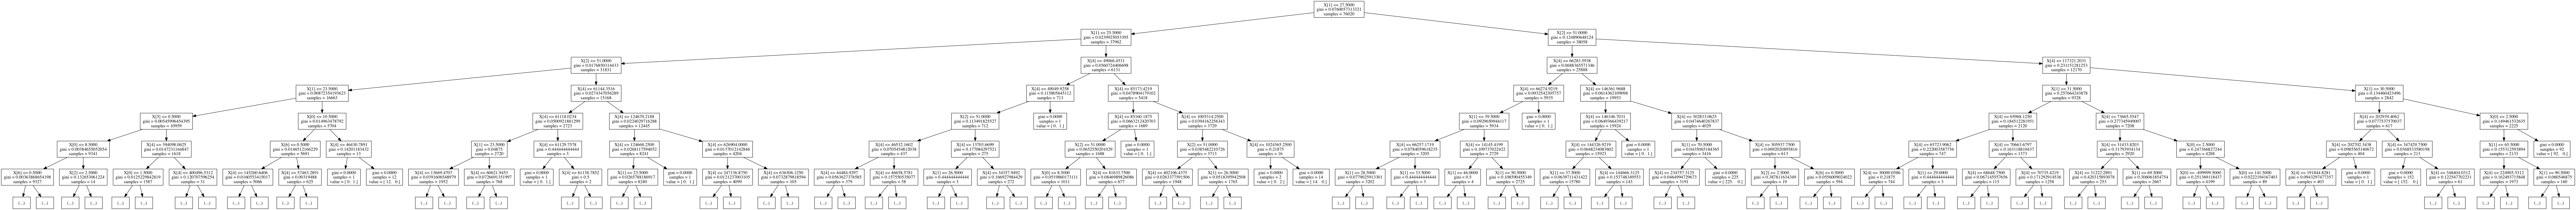

In [31]:
# visiualize decistion tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus
from IPython.display import Image   

dot_data = StringIO()  
tree.export_graphviz(dt_model_gini, out_file = dot_data, max_depth = 6)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# show tree inline
Image(graph.create_png()) 

# Combine model predictions into ensemble predictions

# Bagging algorithms

In [58]:
basic_data.head()

,TARGET,var3,var15,var36,var21,var38
ID,,,,,,
1,0,2,23,99,0,39205.170000
3,0,2,34,3,0,49278.030000
4,0,2,23,99,0,67333.770000
8,0,2,37,2,0,64007.970000
10,0,2,39,1,0,117310.979016


In [106]:
# Bagged Decision Trees for Classification

from sklearn import cross_validation
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
num_folds = 10
num_instances = 15
kfold = cross_validation.KFold(n = num_instances, n_folds = num_folds)
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator = cart)
results = cross_validation.cross_val_score(model, pred_test, tar_test, cv = kfold)
print(results.mean())

/Users/annalie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/annalie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/annalie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/annalie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/annalie/anaconda/lib/

0.95


In [114]:
## BAGGED DECISTION TREE

# Bagged Decision Trees for Classification
# with 10 fold cross-validation

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

num_folds = 10
num_instances = 15
kfold = cross_validation.KFold(n = num_instances, n_folds = num_folds, random_state = seed)
cart = DecisionTreeClassifier()

num_trees_2 = 2
num_trees_4 = 4
num_trees_6 = 6
num_trees_20 = 20

model_2 = BaggingClassifier(base_estimator = cart, n_estimators = num_trees_2)
model_4 = BaggingClassifier(base_estimator = cart, n_estimators = num_trees_4)
model_6 = BaggingClassifier(base_estimator = cart, n_estimators = num_trees_6)
model_20 = BaggingClassifier(base_estimator = cart, n_estimators = num_trees_20)

results_2 = cross_validation.cross_val_score(model_2, pred_test, tar_test, cv = kfold)
results_4 = cross_validation.cross_val_score(model_4, pred_test, tar_test, cv = kfold)
results_6 = cross_validation.cross_val_score(model_6, pred_test, tar_test, cv = kfold)
results_20 = cross_validation.cross_val_score(model_20, pred_test, tar_test, cv = kfold)

print "cross validation score with 2 trees: ", (results_2.mean())
print "cross validation score with 4 trees: ", (results_4.mean())
print "cross validation score with 6 trees: ", (results_6.mean())
print "cross validation score with 8 trees: ", (results_20.mean())
print "---"
print "the # of trees that gives a robust model accuracy varies between 6 to 8 trees"

/Users/annalie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/annalie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/annalie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/annalie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/annalie/anaconda/lib/

cross validation score with 2 trees:  0.85
cross validation score with 4 trees:  0.85
cross validation score with 6 trees:  0.95
cross validation score with 8 trees:  0.85
---
the # of trees that gives a robust model accuracy varies between 6 to 8 trees


/Users/annalie/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [138]:
# Random Forest
# Samples of the training dataset are taken with replacement, 
# but the trees are constructed in a way that reduces the correlation between individual classifiers. 
# Specifically, rather than greedily choosing the best split point in the construction of the tree, 
# only a random subset of features are considered for each split.

from sklearn.ensemble import RandomForestClassifier

num_folds = 10
num_instances = 15
num_trees = 6
kfold = cross_validation.KFold(n = num_instances, n_folds = num_folds)
model = RandomForestClassifier(n_estimators=2)
results = cross_validation.cross_val_score(model, features, labels, cv = kfold)
print results.mean()

TypeError: Singleton array 151838 cannot be considered a valid collection.

In [126]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=2)
rf_model.fit(pred_train, tar_train)

rd_predictions = rf_model.predict(pred_test)

print "confusion matrix:"
print metrics.confusion_matrix(tar_test, rd_predictions)
print "---"
print "accuracy score: ", metrics.accuracy_score(tar_test, rd_predictions)

confusion matrix:
[[36132   398]
 [ 1427    53]]
---
accuracy score:  0.95198631939


/Users/annalie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [137]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=25)
rf_model.fit(pred_train, tar_train)

rd_predictions = rf_model.predict(pred_test)

print "confusion matrix:"
print metrics.confusion_matrix(tar_test, rd_predictions)
print "---"
print "accuracy score: ", metrics.accuracy_score(tar_test, rd_predictions)

confusion matrix:
[[35903   627]
 [ 1408    72]]
---
accuracy score:  0.946461457511


/Users/annalie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



/Users/annalie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/annalie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/annalie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/annalie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/annalie/anaconda/lib/python2.7/site-packages/ipykernel/__

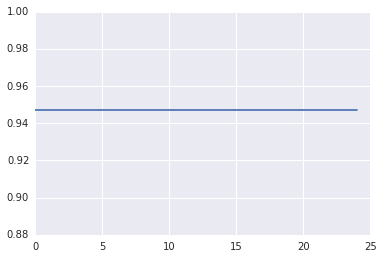

In [99]:
rf_trees = range(25)
rf_accuracy = np.zeros(25)

for idx in range(len(rf_trees)):
    rf_model = RandomForestClassifier(n_estimators = idx + 1)
    rf_model = rf_model.fit(pred_train,tar_train)
    rf_predictions = rf_model.predict(pred_test)
    rf_accuracy[idx] = metrics.accuracy_score(tar_test, predictions)

plt.cla()
plt.plot(rf_trees, rf_accuracy)

In [ ]:
## Boosting
# Gradient boosting involves the creation and addition of decision trees sequentially, 
# each attempting to correct the mistakes of the learners that came before it.

# Grid Search can be used to compare varies specified parameter values for an estimator.

from xgboost import XGBClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
matplotlib.use('Agg')

In [151]:
# grid search
XGB_model = XGBClassifier()
n_estimators = range(2, 40, 2)
param_grid = dict(n_estimators = n_estimators)
kfold = StratifiedKFold(target, n_folds = 10, shuffle = True)
grid_search = GridSearchCV(model, param_grid, scoring = "log_loss", n_jobs = 1, cv = kfold)
result = grid_search.fit(pred_train, tar_train)

IndexError: positional indexers are out-of-bounds

In [ ]:
# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means, stdevs = [], []
for params, mean_score, scores in result.grid_scores_:
    stdev = scores.std()
    means.append(mean_score)
    stdevs.append(stdev)
    print("%f (%f) with: %r" % (mean_score, stdev, params))
    
# plot
pyplot.errorbar(n_estimators, means, yerr = stdevs)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

In [106]:
# find correlations between variables
basic_data_dummy[['TARGET', 'var3', 'var15', 'var21', 'var38', 'var36_1.0', 'var36_2.0', 'var36_3.0']].corr()

,TARGET,var3,var15,var21,var38,var36_1.0,var36_2.0,var36_3.0
TARGET,1.000000,0.004475,0.101322,-0.003719,-0.019510,-0.020391,-0.021914,-0.075636
var3,0.004475,1.000000,-0.004452,0.000175,0.000071,0.002894,0.006648,0.009518
var15,0.101322,-0.004452,1.000000,0.090344,0.006497,0.228220,0.169741,-0.153964
var21,-0.003719,0.000175,0.090344,1.000000,0.008656,0.099093,0.015220,-0.039352
var38,-0.019510,0.000071,0.006497,0.008656,1.000000,0.004838,-0.003141,-0.024963
var36_1.0,-0.020391,0.002894,0.228220,0.099093,0.004838,1.000000,-0.175792,-0.313751
var36_2.0,-0.021914,0.006648,0.169741,0.015220,-0.003141,-0.175792,1.000000,-0.230774
var36_3.0,-0.075636,0.009518,-0.153964,-0.039352,-0.024963,-0.313751,-0.230774,1.000000


In [111]:
# investigate the correlations between the variable id and date_recorded
import scipy

print ('association between dummy variables var36_1.0 and var36_3.0')
print (scipy.stats.pearsonr(basic_data_dummy['var36_1.0'], basic_data_dummy['var36_3.0']))
print "---"
print ('association between dummy variables var15 and var21')
print (scipy.stats.pearsonr(basic_data_dummy['var15'], basic_data_dummy['var21']))
print "---"
print ('association between dummy variables var15 and var36_1.0')
print (scipy.stats.pearsonr(basic_data_dummy['var15'], basic_data_dummy['var36_1.0']))
print "---"
print ('association between dummy variables var15 and var36_2.0')
print (scipy.stats.pearsonr(basic_data_dummy['var15'], basic_data_dummy['var36_2.0']))
print "---"
print ('association between dummy variables var15 and var36_3.0')
print (scipy.stats.pearsonr(basic_data_dummy['var15'], basic_data_dummy['var36_3.0']))

association between dummy variables var36_1.0 and var36_3.0
(-0.3137505385636003, 0.0)
---
association between dummy variables var15 and var21
(0.090343585895528614, 1.6661338399405742e-137)
---
association between dummy variables var15 and var36_1.0
(0.22821958490869299, 0.0)
---
association between dummy variables var15 and var36_2.0
(0.16974146955556232, 0.0)
---
association between dummy variables var15 and var36_3.0
(-0.15396380955567598, 0.0)


Variables var15 and the dummy variables of var36 show significant associations.

# Investigate the relations between the 'saldo' variables and var38

In [30]:
saldo_data.head()

,TARGET,ID,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,saldo_var2_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3
0,0,1,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0.00,0,0,0.00,0,0,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,3,0,0.00,0,0,0,300,0,0,300,0,0,0,0,0,0,0,0,0,0,300.00,0,0,0,0,0.00,0,0,0.00,0,0,0,0.00,88.89,0.00,0.00,0,0,0,0,0,0,0.00,0.00,300,122.22,300,240.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,4,0,3.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0,0,0,0,0.00,0,0,3.00,0,0,0,3.00,0.18,3.00,2.07,0,0,0,0,0,0,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,8,0,70.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70.62,0,0,0,0,34.95,0,0,70.62,0,0,0,186.09,0.00,91.56,138.84,0,0,0,0,0,0,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,10,0,0.00,0,0,135003,0,0,0,0,0,0,0,0,135003,0,0,0,0,0,135003.00,0,0,0,0,0.00,0,0,135003.00,0,0,0,3.00,0.30,40501.08,13501.47,0,0,0,0,0,0,85501.89,85501.89,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
# make the ID variable the index
saldo_data = saldo_data.set_index('ID')

# drop the TARGET column
saldo_data = saldo_data.drop('TARGET', axis=1)

saldo_data.shape

(76020, 71)

In [32]:
saldo_data.shape

(76020, 71)

In [33]:
# remove constant columns
colsToRemove = []
for col in saldo_data.columns:
    if saldo_data[col].std() == 0:
        colsToRemove.append(col)

saldo_data.drop(colsToRemove, axis=1, inplace=True)

# remove duplicate columns
colsToRemove = []
columns = saldo_data.columns
for i in range(len(columns)-1):
    v = saldo_data[columns[i]].values
    for j in range(i+1, len(columns)):
        if np.array_equal(v, saldo_data[columns[j]].values):
            colsToRemove.append(columns[j])

saldo_data.drop(colsToRemove, axis=1, inplace=True)

saldo_data.shape

(76020, 63)

In [34]:
# fit regression model

# prepare data for modeling

# select the features and target for the classification algorythm
features_rm = saldo_data.loc[:,:]

targetcolumn_rm = ['var38']
labels_rm = pd.DataFrame(basic_data, columns = targetcolumn_rm)
labels2_rm = basic_data['TARGET']

# create an array list of the variables
X_rm = saldo_data.loc[:,:]
featurelist_rm = X_rm.columns.tolist()
featurearray_rm = np.asarray(featurelist_rm)

In [35]:
# split the model in a training and test set
pred_train_rm, pred_test_rm, tar_train_rm, tar_test_rm = cross_validation.train_test_split(features_rm, labels_rm, test_size=0.5, random_state=1)

# Create linear regression object
r_model = linear_model.LinearRegression()

# Train the model using the training sets
r_model = r_model.fit(pred_train_rm, tar_train_rm)
r_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
print pred_test_rm.shape
print pred_train_rm.shape
print tar_test_rm.shape
print tar_train_rm.shape

(38010, 63)
(38010, 63)
(38010, 1)
(38010, 1)


In [37]:
# The coefficients
print('Coefficients: \n', r_model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((r_model.predict(pred_test_rm) - tar_test_rm) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r_model.score(pred_test_rm, tar_test_rm))

('Coefficients: \n', array([[  3.10290567e+11,   2.09197144e+12,   1.82038781e+12,
          2.09197144e+12,  -8.30968531e+10,   4.24750550e+10,
          4.24750550e+10,  -5.61615312e+09,  -2.49936626e+12,
          2.17506829e+12,  -5.87398038e+11,  -3.10290567e+11,
          2.17506829e+12,   2.17506829e+12,  -1.24994186e+11,
          1.24994186e+11,   2.45689120e+12,   5.87398038e+11,
          1.24994186e+11,  -5.87398038e+11,  -3.10290567e+11,
         -4.47436263e-01,  -3.10290566e+11,  -4.54886264e+12,
         -5.87398038e+11,   5.61180396e-02,   2.57532241e-01,
          4.17570702e-01,  -4.61905155e-01,   9.99262303e-02,
         -9.29047415e-01,   9.87600138e-02,  -1.01059449e+00,
         -8.44854816e-04,   4.30309634e-03,   1.00815826e-01,
         -2.54208104e-03,  -1.06264544e-01,  -1.65079416e-01,
          2.84648148e-01,  -1.97154079e-01,  -1.80295255e-01,
          1.01477521e-01,   3.07316968e-01,  -1.41647169e-01,
          1.12359117e+08,  -3.90168099e+07,   1.8

In [38]:
print saldo_data.shape
saldo_data.head()

(76020, 63)


,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var42,saldo_var44,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.00,0,0,0,300,0,0,300,0,0,0,0,0,0,0,300.00,0,0,0,0,0.00,0,0.00,0,0.00,88.89,0.00,0.00,0,0,0,0,0,0,0.00,0.00,300,122.22,300,240.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,3.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0,0,0,0,0.00,0,3.00,0,3.00,0.18,3.00,2.07,0,0,0,0,0,0,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,70.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70.62,0,0,0,0,34.95,0,70.62,0,186.09,0.00,91.56,138.84,0,0,0,0,0,0,0.00,0.00,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0.00,0,0,135003,0,0,0,0,0,0,0,0,135003,0,0,135003.00,0,0,0,0,0.00,0,135003.00,0,3.00,0.30,40501.08,13501.47,0,0,0,0,0,0,85501.89,85501.89,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


percentage of variance explained by each of the selected components:
[  1.17392979e-01   9.88039188e-02   8.43196015e-02   6.47441968e-02
   6.42637993e-02   6.38322683e-02   5.54843294e-02   4.66841426e-02
   4.61260167e-02   4.47110045e-02   3.17515979e-02   2.73490354e-02
   1.70636464e-02   1.59882054e-02   1.59161483e-02   1.58952301e-02
   1.58728848e-02   1.58083580e-02   1.55804851e-02   1.52315607e-02
   1.50537822e-02   1.34297020e-02   1.30091329e-02   1.20057954e-02
   1.10613474e-02   1.02217399e-02   9.35902793e-03   6.71709978e-03
   5.97528629e-03   5.53460413e-03   4.84865608e-03   3.05502373e-03
   2.00379859e-03   1.99961624e-03   1.95276723e-03   1.51816240e-03
   1.49630903e-03   1.19583586e-03   1.19032905e-03   9.66617085e-04
   9.57871120e-04   6.97452030e-04   6.52907081e-04   5.19150400e-04
   4.72321968e-04   3.09040764e-04   2.55532368e-04   1.71964369e-04
   1.50724118e-04   1.27705334e-04   1.00263007e-04   7.98468868e-05
   4.30955371e-05   2.78173311e-05

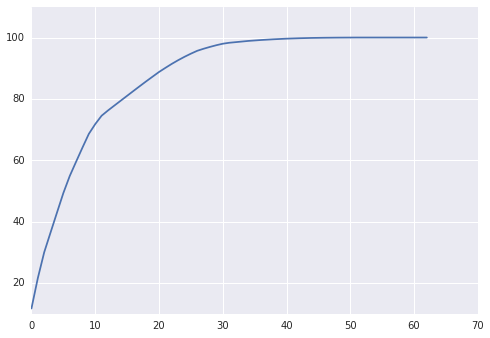

In [46]:
# reduce the variables of all the 'saldo' variables 
# select the features and target for the classification algorythm
features_pca = saldo_data.loc[:,:]

# create an array list of the variables
X_pca = saldo_data.loc[:,:]
featurelist_pca = X_pca.columns.tolist()
featurearray_pca = np.asarray(featurelist_pca)
labels_pca = basic_data['var38']

# targetcolumn_pca = ['var38']
# labels_pca = pd.DataFrame(basic_data, columns = targetcolumn_pca)

from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

# scale the values
X_pca = scale(X_pca)
pca = PCA()
pca.fit(X_pca)

# the amount of variance that each principal component explains
var = pca.explained_variance_ratio_
print "percentage of variance explained by each of the selected components:"
print var

# cumlulative percentage of variance explained by the principal components
var_cum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print "cumlulative percentage of variance explained by each of the selected components:"
print var_cum

plt.plot(var_cum)

Based on the plot above, the variance explained doesn't add any significant value after 30 components. Although 30 is a high number too, the variance explained reduces after 10 components too. Hence, for the model, I'll use 10 principal components.

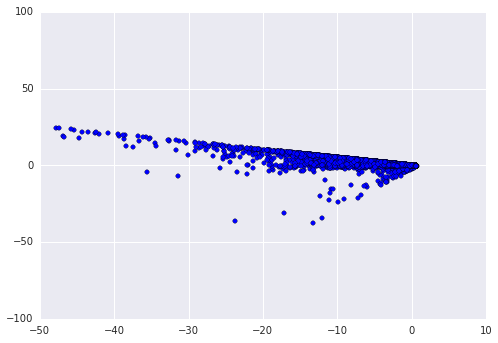

In [47]:
# create a PCA model with only two dimensions
X_pca_2 = PCA(n_components = 2)

# fit the PCA model on the columns from earlier.
var_comp = pca.fit_transform(X_pca)

# Make a scatter plot of each variable, shaded according to cluster assignment.
plt.scatter(x = var_comp[:,0], y = var_comp[:,1])
plt.axis([-50, 10, -100, 100])
plt.show()

# continue here

In [ ]:
https://www.codementor.io/python/tutorial/data-science-python-pandas-r-dimensionality-reduction

/Users/annalie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning:

in the future, boolean array-likes will be handled as a boolean array index

/Users/annalie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning:

in the future, boolean array-likes will be handled as a boolean array index



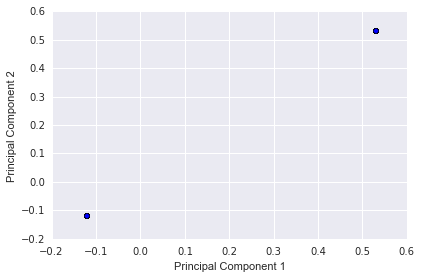

In [66]:
# present the first two principal components in a graph
X_std = X_pca
X_pca2 = PCA(n_components = 2)
Y_pca2 = X_pca2.fit_transform(X_std)

plt.figure(figsize=(6, 4))
plt.scatter(Y_pca2[labels_pca == 1],
            Y_pca2[labels_pca == 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

In [80]:
# create a variable matrix of the reduced dimensions with PCA
x_rm_reduced = X_pca2.fit(X_std)
Y_pca2_reduced = X_pca2.fit_transform(X_std)

In [81]:
Y_pca2_reduced = pd.DataFrame(Y_pca2_reduced)
Y_pca2_reduced.index = saldo_data.index
Y_pca2_reduced.columns = ['PC1','PC2']
Y_pca2_reduced

,PC1,PC2
ID,,
1,0.529933,-0.121130
3,0.518065,-0.121443
4,0.529772,-0.121135
8,0.522647,-0.121779
10,-4.535110,1.963479
13,0.529933,-0.121130
14,0.529766,-0.121140
18,0.529760,-0.121140
20,0.529933,-0.121130


In [83]:
# print the explained variance ratio
print "explained variance ratio: ", X_pca2.explained_variance_ratio_
print "first component explains 11% of the variance and the second component 10%"

explained variance ratio:  [ 0.11739298  0.09880392]
first component explains 11% of the variance and the second component 10%


In [227]:
# fit a second regression model on the reduced set of variables

features_rm_reduced = x_rm_reduced
targetcolumn_rm = ['var38']
labels_rm = pd.DataFrame(basic_data, columns = targetcolumn_rm)

# split the model in a training and test set
pred_train_rm_reduced, pred_test_rm_reduced, tar_train_rm_reduced, tar_test_rm_reduced = cross_validation.train_test_split(features_rm_reduced, labels_rm, test_size=0.5, random_state=1)

# Create linear regression object
r_model_reduced = linear_model.LinearRegression()

# Train the model using the training sets
r_model_reduced = r_model_reduced.fit(pred_train_rm_reduced, tar_train_rm_reduced)

# The coefficients
print('Coefficients: \n', r_model_reduced.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((r_model_reduced.predict(pred_test_rm_reduced) - tar_test_rm_reduced) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r_model_reduced.score(pred_test_rm_reduced, tar_test_rm_reduced))

('Coefficients: \n', array([[  5.78933800e+06,  -1.26558130e+06,   6.32833043e+06,
          5.58354106e+07,  -2.39357767e+06,  -6.42936485e+07,
          1.07584858e+08,   6.90749430e+09,  -2.78000556e+08,
          3.07546897e+08,   3.49307580e+06,  -2.25597753e+08,
         -5.21288729e+07,   9.32348274e+07,  -1.26453168e+09,
          1.95901055e+10,  -4.09625351e+08,   3.35074293e+08,
         -5.40091494e+09,  -7.58909662e+06,   2.13986340e+08,
          6.45504069e+06,  -3.74488201e+06,   6.91616061e+06,
         -2.79824218e+06,   1.04817127e+06,   1.19894704e+07,
          5.81596964e+06,  -6.36425098e+06,  -4.30715704e+06,
          5.06256311e+06,  -4.04931401e+06,  -4.63756752e+06,
          2.41520881e+05,   4.67642989e+05,   8.45292658e+06,
          3.89802674e+06,   1.73253574e+07,   1.28162059e+08,
          1.79645890e+08,  -1.97577037e+09,  -2.39630153e+06,
         -2.68593109e+08,   1.63599462e+06,   2.82544682e+05,
         -2.54200609e+06,   2.12210712e+06,   7.8

# First trial for reducing variables

However, I later found out that reducing 0 values doesn't make sense when you work with dummy variables.

In [31]:
# analyse number of '0' values
value_counts = data.apply(pd.value_counts).fillna(0)
value_counts_list = zip(value_counts, value_counts.loc[0])
value_counts_list

[('ID', 0.0),
 ('var3', 75.0),
 ('var15', 0.0),
 ('imp_ent_var16_ult1', 72301.0),
 ('imp_op_var39_comer_ult1', 66075.0),
 ('imp_op_var39_comer_ult3', 64330.0),
 ('imp_op_var40_comer_ult1', 75725.0),
 ('imp_op_var40_comer_ult3', 75672.0),
 ('imp_op_var40_efect_ult1', 75982.0),
 ('imp_op_var40_efect_ult3', 75975.0),
 ('imp_op_var40_ult1', 75791.0),
 ('imp_op_var41_comer_ult1', 66226.0),
 ('imp_op_var41_comer_ult3', 64480.0),
 ('imp_op_var41_efect_ult1', 69336.0),
 ('imp_op_var41_efect_ult3', 67372.0),
 ('imp_op_var41_ult1', 64388.0),
 ('imp_op_var39_efect_ult1', 69325.0),
 ('imp_op_var39_efect_ult3', 67360.0),
 ('imp_op_var39_ult1', 64271.0),
 ('imp_sal_var16_ult1', 75924.0),
 ('ind_var1_0', 75149.0),
 ('ind_var1', 75734.0),
 ('ind_var2_0', 76020.0),
 ('ind_var2', 76020.0),
 ('ind_var5_0', 3191.0),
 ('ind_var5', 25561.0),
 ('ind_var6_0', 76012.0),
 ('ind_var6', 76018.0),
 ('ind_var8_0', 73524.0),
 ('ind_var8', 73846.0),
 ('ind_var12_0', 70887.0),
 ('ind_var12', 72564.0),
 ('ind_var13_0',

In [59]:
# select the variables where the 0-values are more than 75000
variable_list = [variable for (variable, count) in value_counts_list if count < 75000]
print "# of variables with less than 75000 0-values: ", len(variable_list)
variable_list

# of variables with less than 75000 0-values:  142


['ID',
 'var3',
 'var15',
 'imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'ind_var5_0',
 'ind_var5',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13',
 'ind_var14_0',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var26',
 'ind_var25_0',
 'ind_var25',
 'ind_var30_0',
 'ind_var30',
 'ind_var37_cte',
 'ind_var37_0',
 'ind_var37',
 'ind_var39_0',
 'ind_var41_0',
 'num_var4',
 'num_var5_0',
 'num_var5',
 'num_var8_0',
 'num_var8',
 'num_var12_0',
 'num_var12',
 'num_var13_0',
 'num_var13_corto_0',
 'num_var13_corto',
 'num_var13',
 'num_var14_0',
 'num_var24_0',
 'num_var24',
 'num_var26_0',
 'num_var26',
 'num_var25_0',
 'num_var2

In [56]:
# select only the variables from the 'data' dataframe that occur in the 'variable_list' list
data_reduced_1 = data[['ID',
 'var3',
 'var15',
 'imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'ind_var5_0',
 'ind_var5',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13',
 'ind_var14_0',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var26',
 'ind_var25_0',
 'ind_var25',
 'ind_var30_0',
 'ind_var30',
 'ind_var37_cte',
 'ind_var37_0',
 'ind_var37',
 'ind_var39_0',
 'ind_var41_0',
 'num_var4',
 'num_var5_0',
 'num_var5',
 'num_var8_0',
 'num_var8',
 'num_var12_0',
 'num_var12',
 'num_var13_0',
 'num_var13_corto_0',
 'num_var13_corto',
 'num_var13',
 'num_var14_0',
 'num_var24_0',
 'num_var24',
 'num_var26_0',
 'num_var26',
 'num_var25_0',
 'num_var25',
 'num_op_var41_hace2',
 'num_op_var41_ult1',
 'num_op_var41_ult3',
 'num_op_var39_hace2',
 'num_op_var39_ult1',
 'num_op_var39_ult3',
 'num_var30_0',
 'num_var30',
 'num_var35',
 'num_var37_med_ult2',
 'num_var37_0',
 'num_var37',
 'num_var39_0',
 'num_var41_0',
 'num_var42_0',
 'num_var42',
 'saldo_var5',
 'saldo_var8',
 'saldo_var12',
 'saldo_var13_corto',
 'saldo_var13',
 'saldo_var24',
 'saldo_var26',
 'saldo_var25',
 'saldo_var30',
 'saldo_var37',
 'saldo_var42',
 'var36',
 'delta_imp_aport_var13_1y3',
 'delta_num_aport_var13_1y3',
 'imp_aport_var13_hace3',
 'imp_var43_emit_ult1',
 'imp_trans_var37_ult1',
 'ind_var10_ult1',
 'ind_var10cte_ult1',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'ind_var43_emit_ult1',
 'ind_var43_recib_ult1',
 'num_aport_var13_hace3',
 'num_ent_var16_ult1',
 'num_var22_hace2',
 'num_var22_hace3',
 'num_var22_ult1',
 'num_var22_ult3',
 'num_med_var22_ult3',
 'num_med_var45_ult3',
 'num_meses_var5_ult3',
 'num_meses_var8_ult3',
 'num_meses_var12_ult3',
 'num_meses_var13_corto_ult3',
 'num_meses_var39_vig_ult3',
 'num_op_var39_comer_ult1',
 'num_op_var39_comer_ult3',
 'num_op_var41_comer_ult1',
 'num_op_var41_comer_ult3',
 'num_op_var41_efect_ult1',
 'num_op_var41_efect_ult3',
 'num_op_var39_efect_ult1',
 'num_op_var39_efect_ult3',
 'num_var43_emit_ult1',
 'num_var43_recib_ult1',
 'num_trasp_var11_ult1',
 'num_var45_hace2',
 'num_var45_hace3',
 'num_var45_ult1',
 'num_var45_ult3',
 'saldo_medio_var5_hace2',
 'saldo_medio_var5_hace3',
 'saldo_medio_var5_ult1',
 'saldo_medio_var5_ult3',
 'saldo_medio_var8_hace2',
 'saldo_medio_var8_ult1',
 'saldo_medio_var8_ult3',
 'saldo_medio_var12_hace2',
 'saldo_medio_var12_hace3',
 'saldo_medio_var12_ult1',
 'saldo_medio_var12_ult3',
 'saldo_medio_var13_corto_hace2',
 'saldo_medio_var13_corto_hace3',
 'saldo_medio_var13_corto_ult1',
 'saldo_medio_var13_corto_ult3',
 'var38',
 'TARGET']]

In [60]:
data_reduced_1

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,ind_var5_0,ind_var5,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13,ind_var14_0,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,...,num_op_var41_comer_ult1,num_op_var41_comer_ult3,num_op_var41_efect_ult1,num_op_var41_efect_ult3,num_op_var39_efect_ult1,num_op_var39_efect_ult3,num_var43_emit_ult1,num_var43_recib_ult1,num_trasp_var11_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38,TARGET
0,1,2,23,0,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39205.170000,0
1,3,2,34,0,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,88.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,300.00,122.22,300.00,240.75,49278.030000,0
2,4,2,23,0,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0.18,3.00,2.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,67333.770000,0
3,8,2,37,0,195.00,195.00,195.00,195.00,0,0,195.00,0,0,195.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9,9,0,0,0,0,0,0,0,27,3,18,48,186.09,0.00,91.56,138.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,64007.970000,0
4,10,2,39,0,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,3,6,3,0,0,0,0,3.00,0.30,40501.08,13501.47,0.00,0.00,0.00,0.00,0.00,85501.89,85501.89,0.00,0.00,0.00,0.00,117310.979016,0
5,13,2,23,0,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,87975.750000,0
6,14,2,27,0,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,3.00,0.42,3.00,2.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,94956.660000,0
7,18,2,26,0,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2.88,0.00,3.00,2.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,251638.950000,0
8,20,2,45,0,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,101962.020000,0
9,23,2,25,0,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2.79,0.00,3.00,2.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,356463.060000,0


In [5]:
# # Summary of tabel
#print len(trainDataFrame)
#trainDataFrame.columns

In [7]:
# # Basic statistics
#trainDataFrame.describe()
#trainDataFrame.groupby('TARGET').mean()

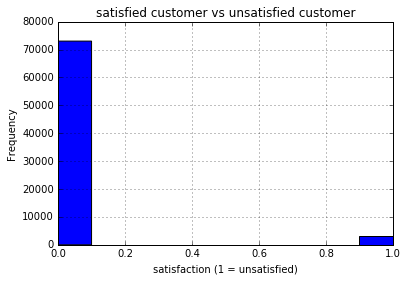

In [8]:
# # Show histogram of satisfied customer vs unsatisfied customer (TARGET score 1 vs 0)
get_ipython().magic(u'matplotlib inline')

trainDataFrame.TARGET.hist()
plt.title('satisfied customer vs unsatisfied customer')
plt.xlabel('satisfaction (1 = unsatisfied)')
plt.ylabel('Frequency')